# Tutorial 1: Perceptron and Linear Separability

In this tutorial we would like to implement and train a simple perceptron.

We will be doing so by using PyTorch. PyTorch is a machine learning framework originally developed by Facebook AI Research (FAIR), but is now a thriving open-source project.

Over the last couple of years it has gained traction in industry and academia as the defacto standard for implementing and deploying neural network models.

PyTorch is particularly useful for implementing nueral networks, because as we will in this and the following tutorials, it provides many of the core operations required to train, implement and test neural networks out-of-the-box, such as applying backpropogation or executing stochastic gradient descend. 

Moreover, PyTorch also provides support for fine-tuning models on Graphical Processing Units (GPUs), this is partcularly useful in many industrial applications where training the models on standard computing hardware might be infeasible.

# Section 1: Implementing a simple linear NN

First let's import PyTorch, make sure you install it if you don't have it already.

In [95]:
# to install pytorch using conda run the following in your terminal:
# conda install -c pytorch pytorch
import torch
import torch.nn as nn

To implement a neural network model in PyTorch we first need to define a template for it, we can do this by extending the nn.Module class

In [96]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1)
        
    def forward(self, x):
        x = self.fc1(x)
        return x

In the __init__ function we specify the type of nueral network we are using

Here we specified it as nn.Linear(2,1), which models a NN with only one neuron that takes two inputs.

fc1 stands for "fully connected" neural network, it is conventional in PyTorch to name neurons in this way, where 1 stands for which layer the neuron lies in. Here we have only one layer, but later in the module we will deal with multi-layer neurons where this convention will make more sense.

In the __forward__ function we specify which function to apply on the input

In this example we specified the output of the neuron to be the plain output returned by nn.Linear neurons, which is just the weigted sum of the input plus the bias of the neuron.

Now that we have specified the template for our neuron (called Net) let's create one:

In [97]:
net1 = Net()

Because we didn't specify any weights and biases for our NN, PyTorch simply picks some random parameters.

You can view these as follows:

In [98]:
print(list(net1.parameters()))

[Parameter containing:
tensor([[-0.5720, -0.1318]], requires_grad=True), Parameter containing:
tensor([-0.6613], requires_grad=True)]


You can see from the above that there are two parameters set, these are the **weights of the neuron** (since we specified that it will take values as input) and one more parameter set, **this is the bias**.

There are two important thing to notice here:

First, the lists are wrapped as __tensor__, this is an important feature of PyTorch, all lists are wrapped in tensors, so you will need to get used to that. You can think of tensors as being more optimised multi-dimensional lists. You can read more about them here:

https://pytorch.org/tutorials/beginner/nlp/pytorch_tutorial.html

You will need to get used to wrapping any list you use with a PyTorch object in the tensor keyword. The good news is that using tensors is very similar to lists or numpy arrays, so there shouldn't be any new conceptual difficulty in using them.

The other second to note in the parameter list is the keywords _requires_grad=True_. This is another importnat keyword in PyTorch which implies these parameters will be optimised by PyTorch if we run any backpropogation algorithm.

We will not be running any backpropogation this tutorial, so you can ignore these keywords for now.

Now let's give our neuron an input to verify it is working properly. First let's create an input consiting of two coordinates (again, note that we have to wrap in a tensor).

In [99]:
i1 = 0.1
i2 = 0.5

x_input1 = torch.tensor([[i1, i2]])

Now let's feed it to the neuron and verfiy the output:

In [100]:
net1(x_input1)

tensor([[-0.7844]], grad_fn=<AddmmBackward0>)

**You should verify that the output is the weighted sum of the inputs plus the bias.**

---

---

## Verification of the Output Calculation

In [101]:
# W1 * i1   +   W2 * i2   +  Teta (Bias)
(net1.fc1.weight.data.numpy()[0][0] * i1) + (net1.fc1.weight.data.numpy()[0][1] * i2) + net1.fc1.bias.data.numpy()[0]

-0.7844226717948913

**This is equal to the output of the net1() nn above.**

---

---

# Section 2: Implementing a perceptorn in PyTorch

To make the above neural network a perceptron, we need to implement a threshold function. This can be specified by filling in the following two gaps:

In [102]:
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(2,1) # Gap 1
        
    def forward(self, x):
        x = self.fc1(x)
        x = torch.heaviside(x, torch.tensor(0.)) # Gap 2
        return x

Notice in the above we applied the heaviside function on x, before returning the output. **That is now our NN returns 1 if its output is more than 0, zero otherwise**. In other words it is now a Perceptron, hence why we also changed it's class name.

It would also be nice to hardcode the initial weights and bias, rather than relying on randomised values set by PyTorch. This can be done as follows:

In [103]:
my_perceptron = Perceptron()
my_perceptron.fc1.weight.data = torch.tensor([[0.4, 0.2]])
my_perceptron.fc1.bias.data = torch.tensor([-0.3])

Here I hardcode the weights 0.4 and 0.2, and the bias -0.3.

**Now let's check the output of this perceptron, and verify it is working as expected (testing both for when it should return 1 and when it should return 0):**

---

---

## The case where output should be 1

In [104]:
i1 = 0.5
i2 = 0.9

x_input2 = torch.tensor([[i1, i2]])

In [105]:
my_perceptron(x_input2)

tensor([[1.]], grad_fn=<NotImplemented>)

In [106]:
# W1 * i1   +   W2 * i2   +  Teta (Bias)
(0.5 * i1) + (0.9 * i2) + (-0.3)

0.76

The weighted sum of the inputs plus the bias is **above 0**, so the fact that the **output of the perceptron is 1** is validated.

## The case where output should be 0

In [107]:
i1 = 0.2
i2 = 0.1

x_input3 = torch.tensor([[i1, i2]])

In [108]:
my_perceptron(x_input3)

tensor([[0.]], grad_fn=<NotImplemented>)

In [109]:
# W1 * i1  +   W2 * i2   +  Teta (Bias)
(0.5 * i1) + (0.9 * i2) + (-0.3)

-0.10999999999999999

The weighted sum of the inputs plus the bias is **below 0**, so the fact that the **output of the perceptron is 0** is validated.

---

---

# Section 3: Solving a classification problem using a Perceptron

You are now equipped with the knowledge of using PyTorch to implement a perceptron that solves the classification problem presented in the following graph. The model takes as input two attributes of a student: 

- **What proportion of exercises solved**  
- **What proportion of lectures they visited**

Both are represented by a number in the interval [0,1]. Students who are above the line are classified as having passed the exam (so they get a value of 1), or zero otherwise (meaning they failed the exam).

**Set  the  weights  of  a  threshold  perceptron  that  implements  this problem.**

<img src="ex1.png">

---

---

## Correction of the Functions

In [110]:
class ExNet(nn.Module):
    def __init__(self):
        super(ExNet, self).__init__()
        self.fc1 = nn.Linear(2,1)
        
        #self.fc1.weights = torch.nn.Parameter(torch.tensor([[w1],[w2]]))
        #self.fc1.bias = torch.nn.Parameter(torch.tensor([[teta]]))
        
        self.heaviside = torch.heaviside
        
    def forward(self, x):
        x = self.fc1(x)
        output = self.heaviside(x, torch.tensor(0.))
        return output

In [111]:
# define weights
w1 = 0.6666667
w2 = 1.0
teta = -0.5

# create the exnet object
exnet = ExNet()

# assign weights
exnet.fc1.weight.data = torch.tensor([[w1, w1]])
exnet.fc1.bias.data = torch.tensor([teta])

## Validation of the Perceptron

Two points that the linear separator intersects will be used as the input to the perceptron. It is expected to see:
- 0 (or values very close to 0) as the output of the weighted input function,
- 0 as the output of the perceptron since 0. has been defined in the heaviside function.

In [112]:
# define inputs
i1 = 0.75
i2 = 0.

# assign inputs
x_input3 = torch.tensor([[i1, i2]])

# print out the weighted input and the output of the nn
print((w1 * i1) + (w2 * i2) + (teta))
print(exnet(x_input3))

2.4999999959085528e-08
tensor([[0.]], grad_fn=<NotImplemented>)


In [113]:
# define inputs
i1 = 0.
i2 = 0.5

# assign inputs
x_input3 = torch.tensor([[i1, i2]])

# print out the weighted input and the output of the nn
print((w1 * i1) + (w2 * i2) + (teta))
print(exnet(x_input3))

0.0
tensor([[0.]], grad_fn=<NotImplemented>)


---

---

# Section 4: Training a perceptron

In the above problem, we first computed the weights of the model by hand and then hardcoded the model with these values. In real life this is impractical, so we need to implement a method that trains the model using some training data. In particular we will be implementing the method presented in the lecture and then we will evaluate it's performance.

We will be using the following small dataset as training:

In [114]:
d = [[0.7, 0.3, 1], 
     [0.4, 0.5, 1], 
     [0.6, 0.9, 1], 
     [0.2, 0.2, 0]
     ]

t = torch.tensor(d)

We will then be using the following template for the perceptron we will train (it is the same one as above, just repeated here for convenience).

In [115]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = torch.heaviside(x, torch.tensor(0.))
        return x

Now let's define some values, first we define our training data (which contains only four training samples), which we call input_vectors, then we specify the learning_rate, and finally we define some initial weights to kick-start our training with:

In [116]:
l = 0.1
i = torch.tensor([-0.5, 0.3, -0.2])

For the training method, it will be useful to have the following helper function, which takes as input a nn and some data, it then returns True, if the nn fails to classify a single sample correctly. That's why it's called keep_training, since whenever it returns True, it will imply that our nn require more training.

In [117]:
def keep_training(nn, data):
    for sample in data:
        if not torch.eq(nn(sample[0:2]), sample[-1]):
            return True
    return False

We now implement a function that implements the learning algorithm on slide 22 of today's lecture:

In [118]:
def train_perceptron(learning_rate, initial_weights, data):
    perceptron = Net() # Gap 1
    perceptron.fc1.bias.data = initial_weights[0] # Gap 2
    perceptron.fc1.weight.data = initial_weights[1:] # Gap 3
    
    while keep_training(perceptron, data):
        for sample in data:
            temp_output = perceptron(sample[0:2]) # Gap 4
            label = sample[-1]
            delta_w = torch.tensor(learning_rate) * (label - temp_output) * torch.tensor([1., sample.numpy()[0], sample.numpy()[1]]) # Gap 5
            print("Label:   ", label)
            print("Output:  ", temp_output)
            print("Delta W: ", delta_w)
            print('---')
            perceptron.fc1.bias.data = perceptron.fc1.bias.data + delta_w[0] # Gap 6
            perceptron.fc1.weight.data = perceptron.fc1.weight.data + delta_w[1:] # Gap 7
        print('---')
        print("Bias:   ", perceptron.fc1.bias.data)
        print("Weight: ", perceptron.fc1.weight.data)
        print('\n')
            
    return perceptron

Let us now run our algorithm, and see how far it goes in solving or classification problem!

In [119]:
train_perceptron(l, i, t)

Label:    tensor(1.)
Output:   tensor(0., grad_fn=<NotImplemented>)
Delta W:  tensor([0.1000, 0.0700, 0.0300], grad_fn=<MulBackward0>)
---
Label:    tensor(1.)
Output:   tensor(0., grad_fn=<NotImplemented>)
Delta W:  tensor([0.1000, 0.0400, 0.0500], grad_fn=<MulBackward0>)
---
Label:    tensor(1.)
Output:   tensor(0., grad_fn=<NotImplemented>)
Delta W:  tensor([0.1000, 0.0600, 0.0900], grad_fn=<MulBackward0>)
---
Label:    tensor(0.)
Output:   tensor(0., grad_fn=<NotImplemented>)
Delta W:  tensor([0., 0., 0.], grad_fn=<MulBackward0>)
---
---
Bias:    tensor(-0.2000)
Weight:  tensor([ 0.4700, -0.0300])


Label:    tensor(1.)
Output:   tensor(1., grad_fn=<NotImplemented>)
Delta W:  tensor([0., 0., 0.], grad_fn=<MulBackward0>)
---
Label:    tensor(1.)
Output:   tensor(0., grad_fn=<NotImplemented>)
Delta W:  tensor([0.1000, 0.0400, 0.0500], grad_fn=<MulBackward0>)
---
Label:    tensor(1.)
Output:   tensor(1., grad_fn=<NotImplemented>)
Delta W:  tensor([0., 0., 0.], grad_fn=<MulBackward0>)


Net(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)

---

---

---

## Run Perceptron for Validation

In [120]:
# create a new perceptron from the nn defined above
perceptron2 = Net()

In [121]:
# define its bias and weights
perceptron2.fc1.bias.data = torch.tensor([-0.2])
perceptron2.fc1.weight.data = torch.tensor([[0.51, 0.03]])

In [122]:
# run the perceptron for the points in the training data
print(perceptron2(torch.tensor([0.7, 0.3])))
print(perceptron2(torch.tensor([0.4, 0.5])))
print(perceptron2(torch.tensor([0.6, 0.9])))
print(perceptron2(torch.tensor([0.2, 0.2])))

tensor([1.], grad_fn=<NotImplemented>)
tensor([1.], grad_fn=<NotImplemented>)
tensor([1.], grad_fn=<NotImplemented>)
tensor([0.], grad_fn=<NotImplemented>)


---

---

## Generalisation Error

**Question:** *Compute the generalisation error of the perceptron trained above w.r.t. the ideal classification given in the above figure, i.e.  draw the classification boundary for the trained perceptron and compare it with that of the figure.*

In [9]:
import matplotlib.pyplot as plt

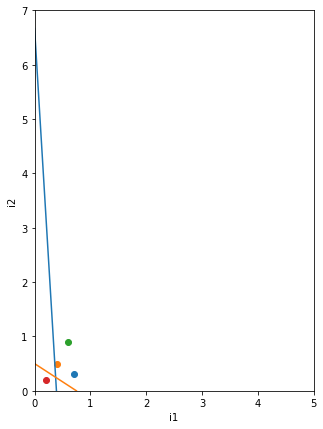

In [11]:
# points for the perceptron in Section 4
point1 = [0, 6.665]
point2 = [0.392, 0]

x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]

# points for the perceptron in Section 3
point11 = [0, 0.5]
point22 = [0.75, 0]

x_values1 = [point11[0], point22[0]]
y_values1 = [point11[1], point22[1]]

# visual adjustments
plt.figure(figsize = (5, 7))
plt.xlim([0, 5])
plt.ylim([0, 7])

plt.xlabel("i1")
plt.ylabel("i2")

# plot the lines
plt.plot(x_values, y_values)
plt.plot(x_values1, y_values1)

# plot the data points in the training data
plt.scatter(d[0][0], d[0][1])
plt.scatter(d[1][0], d[1][1])
plt.scatter(d[2][0], d[2][1])
plt.scatter(d[3][0], d[3][1])